In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("database.csv")
data.head()

C:\Users\mehul\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (7,16,62,64,65,67,68,78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Vehicle ID,Year,Make,Model,Class,Drive,Transmission,Transmission Descriptor,Engine Index,Engine Descriptor,...,Hours to Charge (AC 240V),Composite City MPG,Composite Highway MPG,Composite Combined MPG,Range (FT1),City Range (FT1),Highway Range (FT1),Range (FT2),City Range (FT2),Highway Range (FT2)
0,26587,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9001,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
1,27705,1984,Alfa Romeo,GT V6 2.5,Minicompact Cars,NaN,Manual 5-Speed,NaN,9005,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9002,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Two Seaters,NaN,Manual 5-Speed,NaN,9006,(FFS) CA model,...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0
4,27550,1984,AM General,DJ Po Vehicle 2WD,Special Purpose Vehicle 2WD,2-Wheel Drive,Automatic 3-Speed,NaN,1830,(FFS),...,0.0,0,0,0,0,0.0,0.0,NaN,0.0,0.0


In [5]:
#Task 1 - Analysis pipeline

columns = ['Vehicle ID','Year','Make', 'Model','Fuel Type', 'Fuel Type 1', 'Electric Motor', "Annual Fuel Cost (FT1)", "Annual Consumption in Barrels (FT1)" ] #Names of columns used for the analysis
df1= data.loc[:,columns] #.loc keeps those columns and the data in those columns as a new dataset in df1
df1

,Vehicle ID,Year,Make,Model,Fuel Type,Fuel Type 1,Electric Motor,Annual Fuel Cost (FT1),Annual Consumption in Barrels (FT1)
0,26587,1984,Alfa Romeo,GT V6 2.5,Regular,Regular Gasoline,NaN,1750,16.480500
1,27705,1984,Alfa Romeo,GT V6 2.5,Regular,Regular Gasoline,NaN,1750,16.480500
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Regular,Regular Gasoline,NaN,1650,15.695714
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Regular,Regular Gasoline,NaN,1650,15.695714
4,27550,1984,AM General,DJ Po Vehicle 2WD,Regular,Regular Gasoline,NaN,2050,19.388824
...,...,...,...,...,...,...,...,...,...
38108,37564,2017,Volvo,XC60 FWD,Regular,Regular Gasoline,NaN,1350,12.677308
38109,37547,2017,Volvo,XC90 AWD,Premium,Premium Gasoline,NaN,1900,14.982273
38110,37548,2017,Volvo,XC90 AWD,Premium,Premium Gasoline,NaN,1850,14.330870
38111,37703,2017,Volvo,XC90 AWD PHEV,Premium and Electricity,Premium Gasoline,34 and 65kW DCPM,1700,8.652550


In [6]:
df1=df1.dropna(subset=['Vehicle ID','Year','Make','Fuel Type','Fuel Type 1', "Annual Fuel Cost (FT1)", "Annual Consumption in Barrels (FT1)"])  #drops rows with missing values
df1

,Vehicle ID,Year,Make,Model,Fuel Type,Fuel Type 1,Electric Motor,Annual Fuel Cost (FT1),Annual Consumption in Barrels (FT1)
0,26587,1984,Alfa Romeo,GT V6 2.5,Regular,Regular Gasoline,NaN,1750,16.480500
1,27705,1984,Alfa Romeo,GT V6 2.5,Regular,Regular Gasoline,NaN,1750,16.480500
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Regular,Regular Gasoline,NaN,1650,15.695714
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Regular,Regular Gasoline,NaN,1650,15.695714
4,27550,1984,AM General,DJ Po Vehicle 2WD,Regular,Regular Gasoline,NaN,2050,19.388824
...,...,...,...,...,...,...,...,...,...
38108,37564,2017,Volvo,XC60 FWD,Regular,Regular Gasoline,NaN,1350,12.677308
38109,37547,2017,Volvo,XC90 AWD,Premium,Premium Gasoline,NaN,1900,14.982273
38110,37548,2017,Volvo,XC90 AWD,Premium,Premium Gasoline,NaN,1850,14.330870
38111,37703,2017,Volvo,XC90 AWD PHEV,Premium and Electricity,Premium Gasoline,34 and 65kW DCPM,1700,8.652550


In [7]:
df1 = df1.reset_index() #Resets the index 
df1

,index,Vehicle ID,Year,Make,Model,Fuel Type,Fuel Type 1,Electric Motor,Annual Fuel Cost (FT1),Annual Consumption in Barrels (FT1)
0,0,26587,1984,Alfa Romeo,GT V6 2.5,Regular,Regular Gasoline,NaN,1750,16.480500
1,1,27705,1984,Alfa Romeo,GT V6 2.5,Regular,Regular Gasoline,NaN,1750,16.480500
2,2,26561,1984,Alfa Romeo,Spider Veloce 2000,Regular,Regular Gasoline,NaN,1650,15.695714
3,3,27681,1984,Alfa Romeo,Spider Veloce 2000,Regular,Regular Gasoline,NaN,1650,15.695714
4,4,27550,1984,AM General,DJ Po Vehicle 2WD,Regular,Regular Gasoline,NaN,2050,19.388824
...,...,...,...,...,...,...,...,...,...,...
38108,38108,37564,2017,Volvo,XC60 FWD,Regular,Regular Gasoline,NaN,1350,12.677308
38109,38109,37547,2017,Volvo,XC90 AWD,Premium,Premium Gasoline,NaN,1900,14.982273
38110,38110,37548,2017,Volvo,XC90 AWD,Premium,Premium Gasoline,NaN,1850,14.330870
38111,38111,37703,2017,Volvo,XC90 AWD PHEV,Premium and Electricity,Premium Gasoline,34 and 65kW DCPM,1700,8.652550


In [8]:
df1= df1.drop(columns=['index']) #Gets rid of the index label
df1

,Vehicle ID,Year,Make,Model,Fuel Type,Fuel Type 1,Electric Motor,Annual Fuel Cost (FT1),Annual Consumption in Barrels (FT1)
0,26587,1984,Alfa Romeo,GT V6 2.5,Regular,Regular Gasoline,NaN,1750,16.480500
1,27705,1984,Alfa Romeo,GT V6 2.5,Regular,Regular Gasoline,NaN,1750,16.480500
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Regular,Regular Gasoline,NaN,1650,15.695714
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Regular,Regular Gasoline,NaN,1650,15.695714
4,27550,1984,AM General,DJ Po Vehicle 2WD,Regular,Regular Gasoline,NaN,2050,19.388824
...,...,...,...,...,...,...,...,...,...
38108,37564,2017,Volvo,XC60 FWD,Regular,Regular Gasoline,NaN,1350,12.677308
38109,37547,2017,Volvo,XC90 AWD,Premium,Premium Gasoline,NaN,1900,14.982273
38110,37548,2017,Volvo,XC90 AWD,Premium,Premium Gasoline,NaN,1850,14.330870
38111,37703,2017,Volvo,XC90 AWD PHEV,Premium and Electricity,Premium Gasoline,34 and 65kW DCPM,1700,8.652550


In [9]:
df1.describe(include=[np.number]) #numerical description

,Vehicle ID,Year,Annual Fuel Cost (FT1),Annual Consumption in Barrels (FT1)
count,38113.000000,38113.000000,38113.000000,38113.000000
mean,19170.638496,2000.194527,1970.675360,17.517635
std,11134.878665,10.464573,532.555234,4.577019
min,1.000000,1984.000000,500.000000,0.060000
25%,9529.000000,1991.000000,1600.000000,14.330870
50%,19058.000000,2001.000000,1950.000000,17.347895
75%,28779.000000,2009.000000,2350.000000,20.600625
max,38542.000000,2017.000000,6050.000000,47.087143


In [10]:
df1.describe(exclude=[np.number]) #categorical desciption

,Make,Model,Fuel Type,Fuel Type 1,Electric Motor
count,38113,38113,38113,38113,604
unique,133,3748,14,6,119
top,Chevrolet,F150 Pickup 2WD,Regular,Regular Gasoline,288V Ni-MH
freq,3810,209,25258,26531,117


In [11]:
df1["Cost normalised with consumption"] = df1["Annual Fuel Cost (FT1)"]/df1["Annual Consumption in Barrels (FT1)"] #creates a new column with values that represent fuel cost per 1 barrel
df1 #checks cost per unit consumption

,Vehicle ID,Year,Make,Model,Fuel Type,Fuel Type 1,Electric Motor,Annual Fuel Cost (FT1),Annual Consumption in Barrels (FT1),Cost normalised with consumption
0,26587,1984,Alfa Romeo,GT V6 2.5,Regular,Regular Gasoline,NaN,1750,16.480500,106.186099
1,27705,1984,Alfa Romeo,GT V6 2.5,Regular,Regular Gasoline,NaN,1750,16.480500,106.186099
2,26561,1984,Alfa Romeo,Spider Veloce 2000,Regular,Regular Gasoline,NaN,1650,15.695714,105.124238
3,27681,1984,Alfa Romeo,Spider Veloce 2000,Regular,Regular Gasoline,NaN,1650,15.695714,105.124238
4,27550,1984,AM General,DJ Po Vehicle 2WD,Regular,Regular Gasoline,NaN,2050,19.388824,105.731015
...,...,...,...,...,...,...,...,...,...,...
38108,37564,2017,Volvo,XC60 FWD,Regular,Regular Gasoline,NaN,1350,12.677308,106.489488
38109,37547,2017,Volvo,XC90 AWD,Premium,Premium Gasoline,NaN,1900,14.982273,126.816541
38110,37548,2017,Volvo,XC90 AWD,Premium,Premium Gasoline,NaN,1850,14.330870,129.091957
38111,37703,2017,Volvo,XC90 AWD PHEV,Premium and Electricity,Premium Gasoline,34 and 65kW DCPM,1700,8.652550,196.473870


TASK 3 AND 4

Introduction

The research question I will be focusing on for this project is: Would the fuel economy of existing petrol/diesel powered cars be impacted due to the increasing competition in the market produced by the introduction of electric cars.

In order to try and effectively answer this question, I will be studying various trends; comparing the cost of fuel and its consumption in barrels over the years and exploring the relationship between those trends and the population of electric cars over the years.

C:\Users\mehul\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


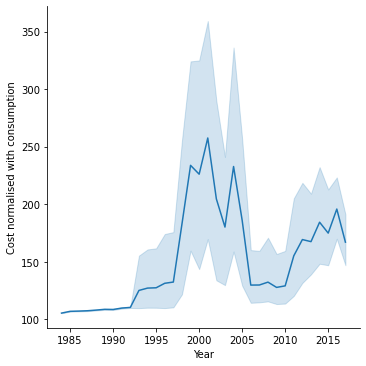

In [13]:
sns.relplot('Year', 'Cost normalised with consumption', data=df1,kind='line')

Figure 1

The figure above is comparing the normalised value of annual cost of fuel per consumption of one barrels over a time period of 30 years. There are four main components of the figure to take into account; firstly, it is important to notice that intially there is a very minimal increase in normalised cost of consumption from 1985 to 1993. Secondly, there are two consecutive jumps in cost; all small one from 1993 to about 1997 followed a big spike from 1997 to about 2005. After that there is brief period where the cost is relatively stable before spiking again from 2010 to 2015.

C:\Users\mehul\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


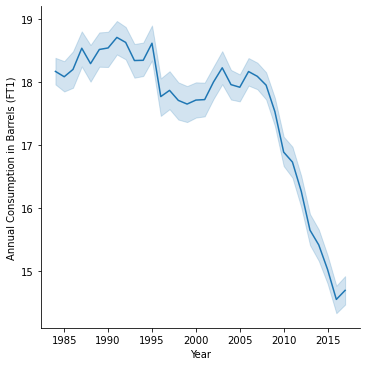

In [20]:
sns.relplot('Year', 'Annual Consumption in Barrels (FT1)', data=df1,kind='line')

Figure 2

The graph above explores the relationship between the Annual consumption of barrels over a time period of 30 years. From the figure we can see that consumption of barrels remained relatively the same from 1985 to 1995. It is important to notice that there was an intial drop in the consumption of barrels after 1995 followed a slight peak between 2002 and 2005 before an even greater decline from 2007 to 2015.

C:\Users\mehul\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


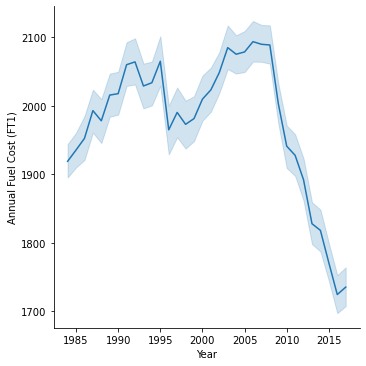

In [21]:
sns.relplot('Year', 'Annual Fuel Cost (FT1)', data=df1,kind='line')

Figure 3

Similarly to the last two figures, this figure compares the relationship between annual cost of fuel over the a time period with 30 years. We can see that there is a peak from 1985 to 1994 before dipping in 1995. The graph then again peaks from 2000 to about 2010 before dropping steeply from 2010 to 2015.

Analysis

From the figures above it is interesting to notice that figures 2 and 3 follow the same general trend. Their peaks and dips align during the same time period. Each peak and dip are at different magnitudes but that could be due scale of the y-axis. This suggests that the relationships presented in both figure 2 and 3 are linear. It is also important to notice that figure 1 seems to present a inverse relationship with figures 1 and 2; the dips and peaks of figure 1 align with the peaks and dips of figures 2 and 3. A possible explaination of this trend from 2010 onwards could be that due to the decrease of barrel consumptions, annual fuel cost also decreased due to lower demand but the cost fuel cost per barrel increased due to lack of demand. This would perhaps explain the dips in figure 2 and 3 and would also explain the spike in figure 1. Similarly, the peaks in figures 2 and 3 could be due to the fact that there is an increased consumption of barrels leading to increased annual fuel cost but the cost per barrel would lower. However, the link between this trend and its relation with electric cars needs to be further explored.


In [22]:
rq2= df1.drop(columns=['Vehicle ID','Make', 'Model', 'Fuel Type 1', 'Electric Motor', "Annual Fuel Cost (FT1)", "Annual Consumption in Barrels (FT1)"])

C:\Users\mehul\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


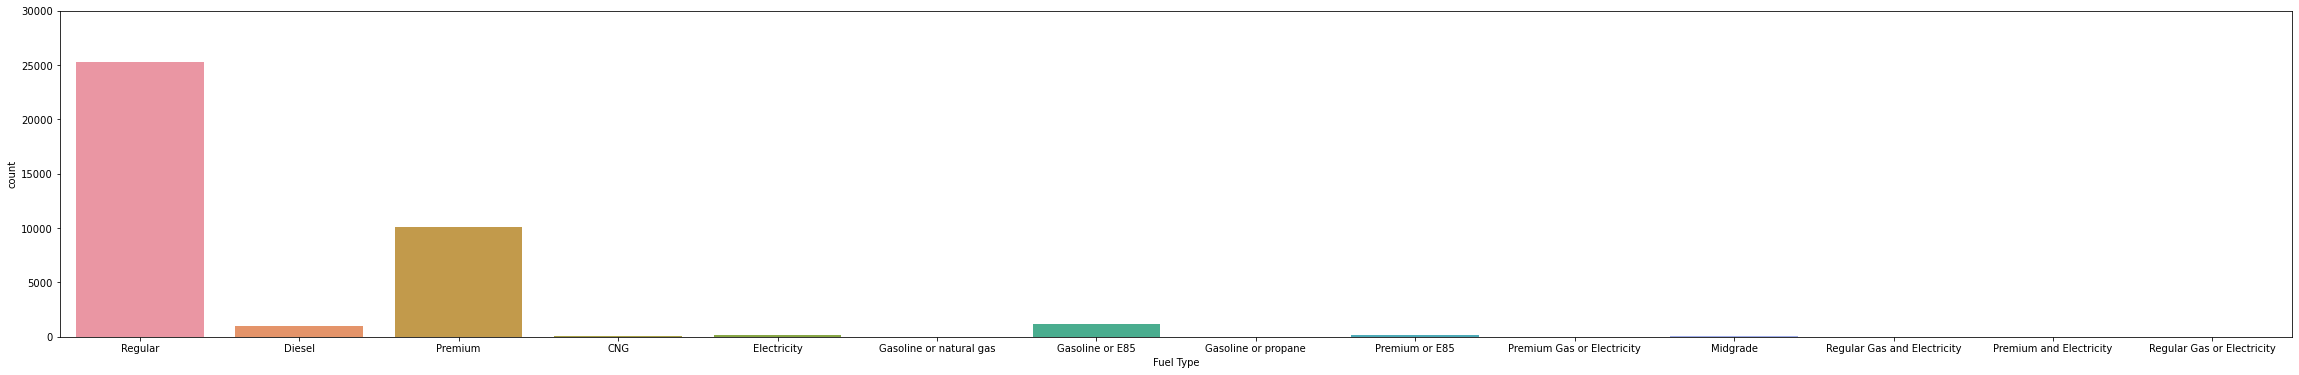

In [23]:
fig_dims = (40, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot("Fuel Type", ax=ax, data=df1)
ax.set(ylim=(0, 30000))
plt.show()

Figure 4

C:\Users\mehul\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


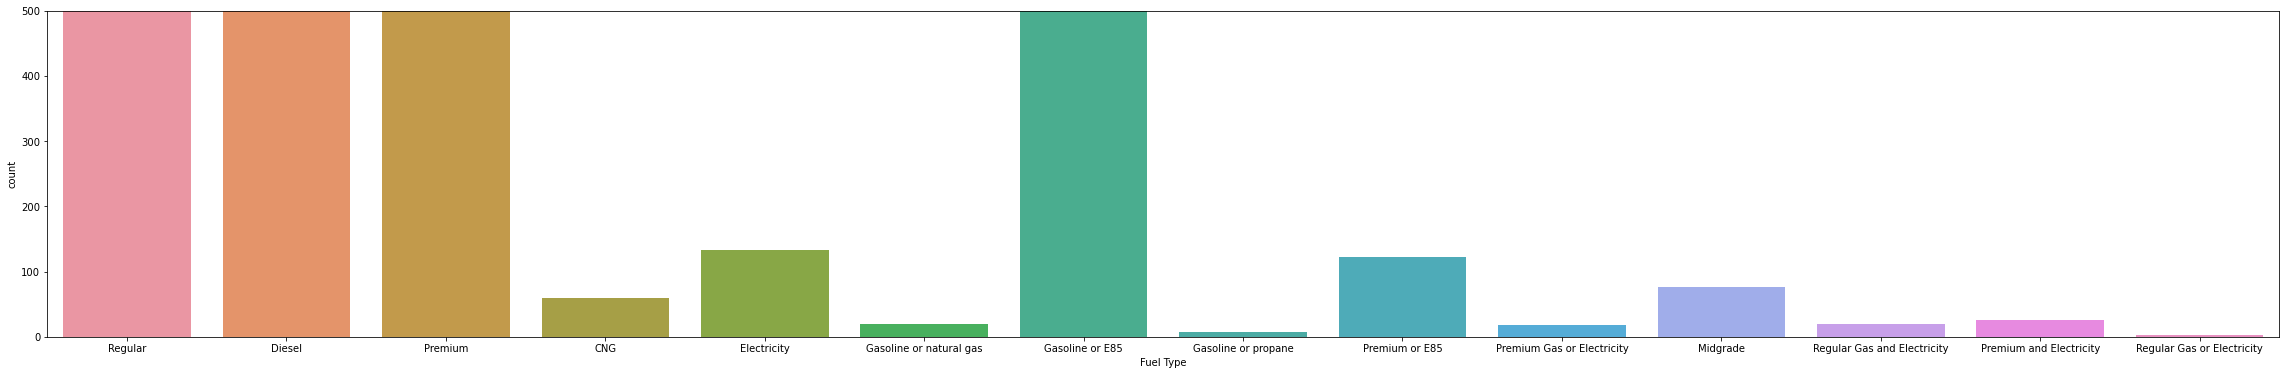

In [24]:
fig, ay = plt.subplots(figsize=fig_dims)
ay = sns.countplot("Fuel Type", ax=ay, data=df1)
ay.set(ylim=(0, 500))
plt.show()


Figure 5

The two graphs above represent the number of cars of a certain fuel type at two different scales. These graphs the purpose of providing a perspective between the amount of differently powered cars.


In [6]:
fuelyr = df1.groupby(['Year','Fuel Type']).size().reset_index()

fuelyr.head(100)
#fig, az = plt.subplots(figsize=fig_dims)
#sns.lineplot("Year", "Fuel Type", data=fuelyr)


,Year,Fuel Type,0
0,1984,Diesel,262
1,1984,Regular,1702
2,1985,Diesel,158
3,1985,Premium,101
4,1985,Regular,1442
...,...,...,...
95,2005,CNG,5
96,2005,Diesel,14
97,2005,Gasoline or E85,40
98,2005,Premium,464


Figure 6

This figure shows the change in population of differently fueled cars over a period of 30 years.

<AxesSubplot:xlabel='Annual Fuel Cost (FT1)', ylabel='Fuel Type'>

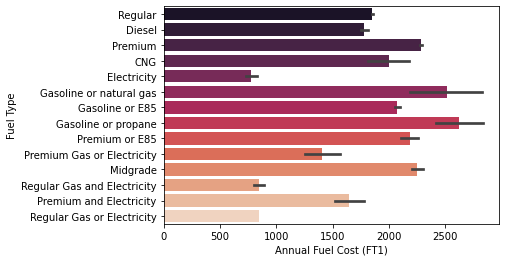

In [8]:
az=sns.barplot(x='Annual Fuel Cost (FT1)',y='Fuel Type',data=df1, palette= 'rocket')
az

Figure 7

This figure shows the relative cost of fuel for each differently powered vehicle.


From figures 4 and 5 we can see that initially there is a larger volume of regular, diesel and premium powered cars compared to electric and hybrid powered cars. From figure 6, we can see that over a span of 30 years, there has been a significant increase in the population of electric and hybrid cars, the largest increase being over the last decade. From figure 7, we can discern that generally, electric powered cars and hybrid cars offer a relatively low annual cost. These trends seem to explain the cause of the initial hypothesis made as being due to the increased popularity of electric and hybird cars. From figure 6, we can see that there is a significant increase in the number of electric and hybrid cars around 2010. This coupled with the fact that electric and hybrid cars are relatively cheaper (as shown in figure 7) could possibly explain the dips in figures 2 and 3 and consequently the peak in figure 1 around that time. 